# Импорт библиотек и загрузка данных

In [1]:
import numpy as np 
import pandas as pd 

# plt

import plotly.express as px
import plotly.io as pio
pio.renderers.default='notebook'
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/potopnins/Проект1.csv', sep=';', engine= 'python', parse_dates=['Дата_Создания'])

# Data Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2904805 entries, 0 to 2904804
Data columns (total 12 columns):
 #   Column               Dtype         
---  ------               -----         
 0   Клиент_Но            object        
 1   Документ_Но          object        
 2   Дата_Создания        datetime64[ns]
 3   Товар_Но             object        
 4   Наименование_Товара  object        
 5   Бренд                object        
 6   Merdis_ПодГруппа     object        
 7   Merdis_Группа        object        
 8   Рег_Офис             object        
 9   РО_Отдел             object        
 10  Оборот               object        
 11  Количество           int64         
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 265.9+ MB


In [4]:
#подправим оборот, должно быть float
df['Оборот'] = df['Оборот'].str.replace('[A-Za-z]', '').str.replace(',', '.').astype(float)

In [5]:
#сохраним shape для того чтобы сравнить потерю в данных
df_shape_first = df.shape[0]

In [6]:
#смотрим на разброc колчисетвенных признаков
print('Столбец Оборот')
print(df.Оборот.describe())
print('Столбец количество')
print(df.Количество.describe())

Столбец Оборот
count    2.904805e+06
mean     3.965769e+03
std      8.565709e+03
min      0.000000e+00
25%      3.900000e+02
50%      1.250000e+03
75%      3.572000e+03
max      9.875800e+05
Name: Оборот, dtype: float64
Столбец количество
count    2.904805e+06
mean     1.166244e+00
std      2.745862e+00
min     -9.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+03
Name: Количество, dtype: float64


###### В обороте есть значения меньше 1, в количестве есть отрицательные значения. Убираем все что меньше 1

In [7]:
df = df[(df.Оборот>1)&(df.Количество>0)]

In [8]:
#смотрим на данные
def param_data(data): 
    param = pd.DataFrame({
              'dtypes': data.dtypes.values,
              'nunique': data.nunique().values,
              'isna': data.isna().sum().values,
              'loc[0]': data.loc[0].values,
              }, 
             index = data.loc[0].index)
    return param

param_data(df)

,dtypes,nunique,isna,loc[0]
Клиент_Но,object,104837,0,I0000290
Документ_Но,object,1831870,0,U6824822
Дата_Создания,datetime64[ns],699,0,2020-07-15 00:00:00
Товар_Но,object,79025,0,1139447
Наименование_Товара,object,76903,0,Роутер беспроводной TP-Link Archer A5 AC1200 1...
Бренд,object,939,0,TP-LINK
Merdis_ПодГруппа,object,764,0,Wi-Fi роутеры/маршрутизаторы
Merdis_Группа,object,67,0,Сетевое оборудование
Рег_Офис,object,90,0,СИТИ_ЕКАТ
РО_Отдел,object,189,0,СИТИ_ЕКАТ2


In [9]:
#смотрим на сколько усох датасет
df.shape[0]/df_shape_first

0.9551109282722937

##### Потери чуть меньше 5% Оставляем как есть и добавляем столбцы с данными по годам и месяцам и дням.

In [10]:
df['Год'] = pd.DatetimeIndex(df['Дата_Создания']).year
df['Месяц'] = pd.DatetimeIndex(df['Дата_Создания']).month

In [11]:
df['День_недели']=df['Дата_Создания'].dt.weekday
df['День_недели'] = df['День_недели'].replace({0:'Пон', 1:'Вт',2:'Ср', 3:'Чт', 4:'Пт', 5:'Сб', 6:'Вс'})

In [12]:
# сортирнем данные
df = df.reset_index().sort_values(by=['Клиент_Но', 'Документ_Но', 'Дата_Создания', 'Товар_Но', 'РО_Отдел', 'index']).set_index('index')

# EDA

In [13]:
from sklearn import preprocessing
#Выбираем столбцы с типом object
objFeatures = df.select_dtypes(include="object").columns

#Делаем цикл чтобы закодировать данные с типом object
le = preprocessing.LabelEncoder()

for feat in objFeatures:
    df[feat] = le.fit_transform(df[feat].astype(str))

In [14]:
df.reset_index(drop=True)

,Клиент_Но,Документ_Но,Дата_Создания,Товар_Но,Наименование_Товара,Бренд,Merdis_ПодГруппа,Merdis_Группа,Рег_Офис,РО_Отдел,Оборот,Количество,Год,Месяц,День_недели
0,0,10526,2019-03-13,58254,69055,656,236,1,54,115,470.0,1,2019,3,5
1,0,21880,2019-05-28,16588,35303,407,363,10,54,115,1670.0,1,2019,5,1
2,0,216728,2019-12-24,53104,25067,309,286,6,54,115,1570.0,1,2019,12,1
3,0,563138,2020-04-25,58256,69113,656,236,1,54,115,1467.0,1,2020,4,4
4,0,824045,2020-07-22,56667,35316,407,363,10,54,115,2590.0,1,2020,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2774406,104836,958136,2020-09-06,65173,774,884,14,25,48,102,2650.0,1,2020,9,0
2774407,104836,1162863,2020-11-22,51916,53867,527,510,25,48,102,540.0,1,2020,11,0
2774408,104836,1484964,2019-07-13,14203,30979,171,336,17,48,102,7154.0,1,2019,7,4
2774409,104836,1485817,2019-07-13,66894,16366,115,74,6,48,102,360.0,1,2019,7,4


### В какой месяц больше всего покупают

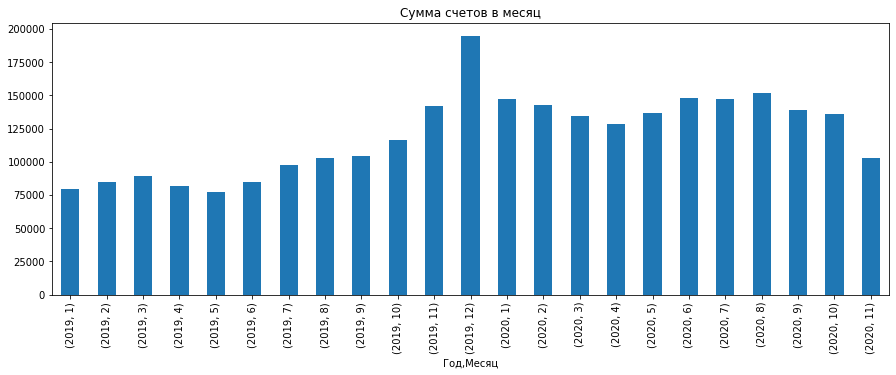

In [15]:
df.groupby(['Год', 'Месяц']).Дата_Создания.count().plot(kind='bar', title='Сумма счетов в месяц', figsize=(15,5))

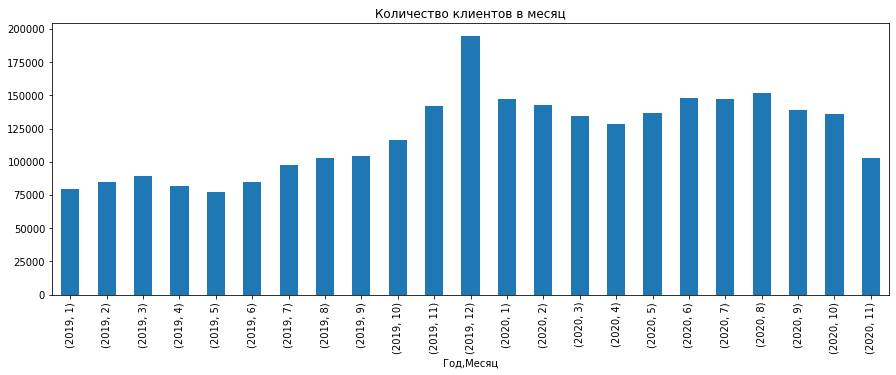

In [16]:
df.groupby(['Год', 'Месяц']).Клиент_Но.count().plot(kind='bar', title='Количество клиентов в месяц', figsize=(15,5))

In [ ]:
# Оборот в месяц - ожидаемо в декабре
df.groupby(['Дата_Создания', 'Оборот']).Дата_Создания.count().plot(kind='bar', title='Оборот в месяц', figsize=(15,5))
#px.bar(df[['Дата_Создания','Оборот']].set_index('Дата_Создания').resample('M').sum().reset_index(),
      # x='Дата_Создания', y='Оборот', title = 'Оборот в месяц')

In [18]:
px.bar(df[['Дата_Создания','Оборот']].set_index('Дата_Создания').resample('W').sum().reset_index(),
       x='Дата_Создания', y='Оборот', title = 'Продажи по неделям')

In [19]:
px.bar(df.groupby('День_недели').Оборот.sum().reset_index(), x='День_недели', y='Оборот')

#### Рспределение дохода и количества счетов, используем 2019 полный год

In [20]:
a=df[df.Год==2019].groupby('Месяц').Документ_Но.nunique().reset_index()
b=df[df.Год==2019].groupby('Месяц').Оборот.sum().reset_index()
a=a.merge(b, right_on='Месяц', left_on='Месяц', how='inner')
px.scatter(a, x='Документ_Но', y='Оборот', hover_data=['Месяц'], title = 'Сумма счетов и распределение общего дохода')

#### 10 городов по топ продажам и 10 городов с самыми маленькими продажами

In [21]:
px.pie(df.groupby('Рег_Офис').Оборот.sum().reset_index().sort_values(by=['Оборот']).tail(10), values='Оборот', names='Рег_Офис', 
      title='ТОП 10 городов по продажам')

In [22]:
px.pie(df.groupby('Рег_Офис').Оборот.sum().reset_index().sort_values(by=['Оборот']).head(10), values='Оборот', names='Рег_Офис', 
      title='Самые маленькие продажи')

In [23]:
px.pie(df.groupby('Бренд').Оборот.sum().reset_index().sort_values(by=['Оборот']).tail(10), values='Оборот', names='Бренд', 
      title='Топ 10 Брендов')

In [24]:
px.pie(df.groupby('Merdis_ПодГруппа').Оборот.sum().reset_index().sort_values(by=['Оборот']).tail(10), values='Оборот', names='Merdis_ПодГруппа', 
      title='Топ 10 товарных Групп')

In [25]:
grouped_df = df.groupby('Наименование_Товара')['Количество'].aggregate("max").reset_index().sort_values(by=['Количество']).tail(20)
grouped_df.sort_values(by=['Количество'], ascending=False, inplace=True)
grouped_df

,Наименование_Товара,Количество
55108,55108,1000
47844,47844,800
47918,47918,800
47922,47922,600
47914,47914,600
47917,47917,600
20547,20547,600
55330,55330,500
55331,55331,500
57774,57774,400


In [26]:
#Посмотрим какой клиент, какой товар чаще всего покупает.
temp = df[['Клиент_Но', 'Наименование_Товара', 'Документ_Но']].groupby(['Клиент_Но', 'Наименование_Товара',]).count()
temp.sort_values("Документ_Но", ascending=False, inplace=True)
temp.reset_index(drop=False, inplace=True)
temp.rename(columns={'Наименование_Товара': 'Популярный_продукт',}, inplace=True)
temp.drop_duplicates(subset= ['Клиент_Но'], keep = "first", inplace=True)
temp.head(20)

,Клиент_Но,Популярный_продукт,Документ_Но
0,9890,17739,178
2,10327,69686,124
5,96717,54647,80
6,59288,35164,70
7,1276,54726,64
8,12233,17905,62
9,100327,11807,62
10,52770,17811,61
11,92171,69784,60
12,94348,54726,60


# Summary
**- У бизнеса явновыраженная сезонность с пиком продаж в декабре и самыми низкими продажами в апреле и мае.**

**- В будние дни продажи лучше чем в выходные.**

**- Самая результативная неделя - последняя неделя декабря, худшая на майские праздники.**

**- Лучшие продажи в Рег_Офис 38, худшие в Рег_Офис 9**

**- Самый популярный брэнд - 656**

**- Популярная категория - 378.**

**- В штуках больше всего продано 55108**

**- Топ в продажах по связке клиент/товар - 17739**